In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt
from sklearn.metrics import r2_score

from matplotlib.ticker import OldScalarFormatter, ScalarFormatter
from matplotlib.ticker import FormatStrFormatter

In [2]:
# Import the excel file and call it xls_file
xls_file = pd.ExcelFile('prod.xlsx')
df = xls_file.parse('Sheet1')
df

,Propped fracture surface area,Total fracture surface area,"Cumulative production, (MSCF)"
0,212212.000000,341717,1.348393e+06
1,14446.299805,113978,1.645816e+05
2,172741.000000,333962,1.167253e+06
3,21288.099609,133349,2.711478e+05
4,73184.203125,251926,6.748454e+05
5,158657.000000,312164,1.057715e+06


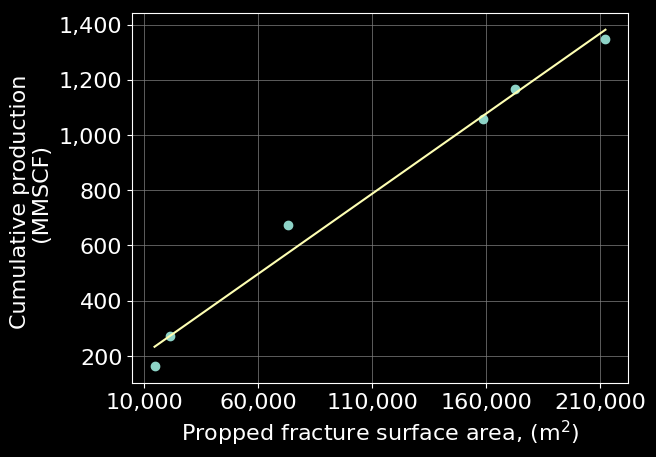

In [111]:
z = np.polyfit(df['Propped fracture surface area'], (df["Cumulative production, (MSCF)"]), 1)
p = np.poly1d(z)
plt.style.use('dark_background')
#plt.style.use(['default'])
xp = np.linspace(df['Propped fracture surface area'].min(), df['Propped fracture surface area'].max(), 100)
r2 = r2_score(df["Cumulative production, (MSCF)"], p(df['Propped fracture surface area']))

plt.plot(df['Propped fracture surface area'], df["Cumulative production, (MSCF)"], 'o', xp, p(xp), '-')

ax = plt.gca()
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(np.arange(10000, 250000, 50000))
#plt.ticklabel_format(style='sci', axis='y', scilimits=(-2,2))
plt.xlabel('Propped fracture surface area, (m$^2$)')
plt.ylabel("Cumulative production \n (MMSCF)")


SMALL_SIZE = 8
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE,  weight='normal')          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title|
ax.grid(color='0.5', linestyle='-', linewidth=0.5, zorder=0)

plt.show()

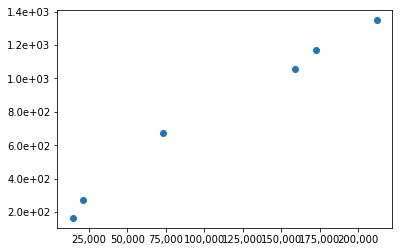

In [97]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
ax.plot(df['Propped fracture surface area'], df["Cumulative production, (MSCF)"],'o')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()



In [9]:
df['Propped fracture surface area'].min()

14446.2998046875

In [55]:
r2 = r2_score(df["Cumulative production, (MSCF)"], p(df['Propped fracture surface area']))

In [56]:
r2

0.99419894670861231

In [33]:

df["Cumulative production, (MSCF)"] = df["Cumulative production, (MSCF)"].apply(lambda x: (x*1000)/1e6)

In [34]:
df

,Propped fracture surface area,Total fracture surface area,"Cumulative production, (MSCF)"
0,212212.000000,341717,1348.392750
1,14446.299805,113978,164.581594
2,172741.000000,333962,1167.253000
3,21288.099609,133349,271.147781
4,73184.203125,251926,674.845438
5,158657.000000,312164,1057.714875


In [8]:
z

array([ -1.14526620e-05,   8.27632703e+00,   8.30169533e+04])

In [28]:
np.arange(min(df['Propped fracture surface area']), max(df['Propped fracture surface area']), ((max(df['Propped fracture surface area']-min(df['Propped fracture surface area']))))/10)

array([  14446.29980469,   34222.86982422,   53999.43984375,
         73776.00986328,   93552.57988281,  113329.14990234,
        133105.71992188,  152882.28994141,  172658.85996094,
        192435.42998047])

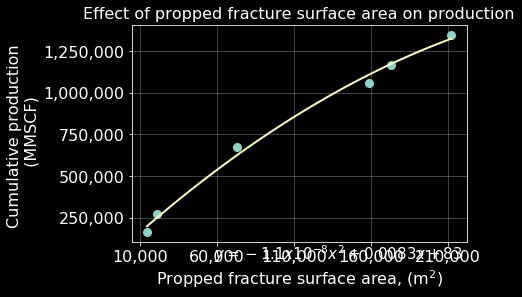

In [30]:
z = np.polyfit(df['Propped fracture surface area'], (df["Cumulative production, (MSCF)"]), 2)
p = np.poly1d(z)

xp = np.linspace(df['Propped fracture surface area'].min(), df['Propped fracture surface area'].max(), 100)
r2 = r2_score(df["Cumulative production, (MSCF)"], p(df['Propped fracture surface area']))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(df['Propped fracture surface area'], df["Cumulative production, (MSCF)"],'o',markersize=8)
ax.plot(xp, p(xp),'-',linewidth=2)



ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(np.arange(10000, 250000, 50000))
#plt.ticklabel_format(style='sci', axis='y', scilimits=(-2,2))
plt.xlabel('Propped fracture surface area, (m$^2$)')
plt.ylabel("Cumulative production \n (MMSCF)")
plt.title("Effect of propped fracture surface area on production")


SMALL_SIZE = 8
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE,  weight='normal')          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title|
ax.grid(color='0.5', linestyle='-', linewidth=0.5, zorder=0)
plt.text(58000,300, '$ y=-1.1x10^{-8}x^{2}+0.0083x+83 $', fontsize=15)

#plt.savefig('prod-2.pdf',dpi=500,bbox_inches='tight')

plt.show()

In [88]:
z

array([  5.80463463e-03,   1.49374219e+02])

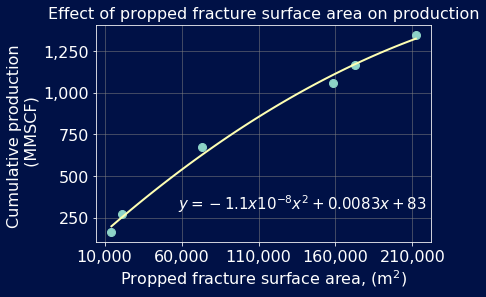

In [35]:
#as above with dark background
z = np.polyfit(df['Propped fracture surface area'], (df["Cumulative production, (MSCF)"]), 2)
p = np.poly1d(z)

bg_color='#001146'

xp = np.linspace(df['Propped fracture surface area'].min(), df['Propped fracture surface area'].max(), 100)
r2 = r2_score(df["Cumulative production, (MSCF)"], p(df['Propped fracture surface area']))

fig = plt.figure(facecolor=bg_color)
ax = fig.add_subplot(1,1,1)

ax.plot(df['Propped fracture surface area'], df["Cumulative production, (MSCF)"],'o',markersize=8)
ax.plot(xp, p(xp),'-',linewidth=2)



ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(np.arange(10000, 250000, 50000))
#plt.ticklabel_format(style='sci', axis='y', scilimits=(-2,2))
plt.xlabel('Propped fracture surface area, (m$^2$)')
plt.ylabel("Cumulative production \n (MMSCF)")
plt.title("Effect of propped fracture surface area on production")

ax.set_facecolor(bg_color)

SMALL_SIZE = 8
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE,  weight='normal')          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title|
ax.grid(color='0.5', linestyle='-', linewidth=0.5, zorder=0)
plt.text(58000,300, '$ y=-1.1x10^{-8}x^{2}+0.0083x+83 $', fontsize=15)
plt.style.use('dark_background')
#plt.savefig('prod-2.pdf',dpi=500,bbox_inches='tight')

plt.show()